# Model training

## Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, Model


In [2]:
outdir = "out_p_a1_given_q_xeff"
# import data
data = pd.read_pickle(f"{outdir}/p_a1_given_q_xeff.pkl")

In [3]:
data

,q,xeff,a1,p_a1
0,0.0,-1.0,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,0.0,-0.8,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,0.0,-0.6,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,0.0,-0.4,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,0.0,-0.2,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...
116,1.0,0.2,"[0.0, 0.002004008016032064, 0.0040080160320641...","[1.0680033419862862, 1.0678605941877117, 1.067..."
117,1.0,0.4,"[0.0, 0.002004008016032064, 0.0040080160320641...","[0.7832345001188603, 0.7843442342552497, 0.784..."
118,1.0,0.6,"[0.2064128256513026, 0.2080031807101176, 0.209...","[0.0003581317510958827, 0.0006423405154926148,..."
119,1.0,0.8,"[0.6112224448897795, 0.6120015582266737, 0.612...","[0.003378646421929789, 0.004692188317429458, 0..."


## Pre-processing

### Some data contains nans, drop them so that they wont cause problems later

In [4]:
data.drop([0,1,2,3,4,5,6,7,8,9,10,11,21,22,32,33,43,44,54,55,65,66,76,77,87,88,98,99,109,110,120], inplace=True)

In [5]:
data.reset_index(drop=True, inplace=True)

Stupid way of getting everything to a numpy array with dtyoe = float64

In [6]:
a1 = []
for i in range(len(data)):
    a1.append(data['a1'][i])
a1 = np.array(a1)
p = []
for i in range(len(data)):
    p.append(data['p_a1'][i])
p = np.array(p)
q = data['q'].values
xeff = data['xeff'].values

In [7]:
# from sklearn.preprocessing import normalize
# p_norm = normalize(p,axis=0)

### Spliting data into train and test

In [8]:
# split into train and test
from sklearn.model_selection import train_test_split
train_q, test_q, train_xeff, test_xeff, train_p, test_p, train_a1, test_a1 \
= train_test_split(q, xeff, p, a1,
 test_size=0.2, random_state=42)

### Pair q and xeff

In [9]:
train_q_xeff = np.stack((train_q, train_xeff), axis=1)

## Define model

In [10]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)

In [11]:
opt = keras.optimizers.SGD(learning_rate = 0.1)
model.compile(optimizer= opt,
                loss=tf.keras.losses.MeanSquaredError(),
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 1s - loss: 4.9997 - accuracy: 0.0000e+00 - val_loss: 2.3168 - val_accuracy: 0.0000e+00 - 628ms/epoch - 79ms/step
Epoch 2/500
8/8 - 0s - loss: 4.2604 - accuracy: 0.0000e+00 - val_loss: 2.0488 - val_accuracy: 0.0000e+00 - 27ms/epoch - 3ms/step
Epoch 3/500
8/8 - 0s - loss: 3.4282 - accuracy: 0.0000e+00 - val_loss: 1.7749 - val_accuracy: 0.0000e+00 - 29ms/epoch - 4ms/step
Epoch 4/500
8/8 - 0s - loss: 3.0435 - accuracy: 0.0000e+00 - val_loss: 1.6549 - val_accuracy: 0.0000e+00 - 29ms/epoch - 4ms/step
Epoch 5/500
8/8 - 0s - loss: 2.5875 - accuracy: 0.0175 - val_loss: 1.4790 - val_accuracy: 0.0000e+00 - 29ms/epoch - 4ms/step
Epoch 6/500
8/8 - 0s - loss: 2.5587 - accuracy: 0.0000e+00 - val_loss: 1.4888 - val_accuracy: 0.0000e+00 - 28ms/epoch - 4ms/step
Epoch 7/500
8/8 - 0s - loss: 2.6801 - accuracy: 0.0175 - val_loss: 1.2342 - val_accuracy: 0.0000e+00 - 28ms/epoch - 3ms/step
Epoch 8/500
8/8 - 0s - loss: 2.0820 - accuracy: 0.0702 - val_loss: 1.1722 - val_accuracy: 0.0000e+00 - 

1/1 [==============================] - 0s 15ms/step - loss: 0.4817 - accuracy: 0.0000e+00


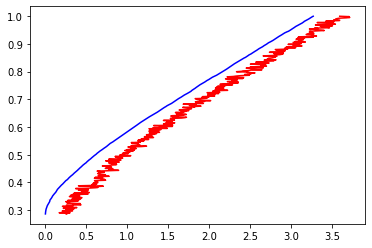

In [12]:
# evaluate model
test_q_xeff = np.stack((test_q, test_xeff), axis=1)
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])
plt.plot(test_p_pred[3],test_a1[3],label = 'pred',color = 'red')
plt.plot(test_p[3],test_a1[3],label = 'true',color = 'blue')

Text(0, 0.5, 'loss')

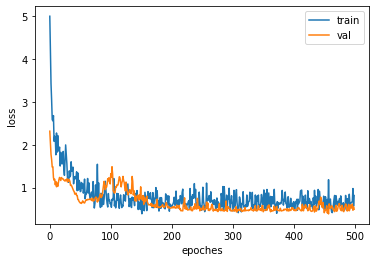

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

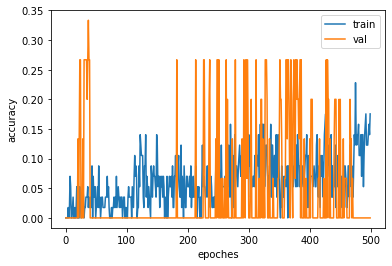

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [51]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)

In [52]:
opt = keras.optimizers.SGD(learning_rate = 1)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 0s - loss: 3.8439 - accuracy: 0.0526 - val_loss: 29.0746 - val_accuracy: 0.0000e+00 - 477ms/epoch - 60ms/step
Epoch 2/500
8/8 - 0s - loss: 1.8347 - accuracy: 0.0526 - val_loss: 50.4858 - val_accuracy: 0.0000e+00 - 28ms/epoch - 3ms/step
Epoch 3/500
8/8 - 0s - loss: 1.9090 - accuracy: 0.0175 - val_loss: 116.6289 - val_accuracy: 0.0667 - 42ms/epoch - 5ms/step
Epoch 4/500
8/8 - 0s - loss: 1.1401 - accuracy: 0.0175 - val_loss: 34.5742 - val_accuracy: 0.0000e+00 - 33ms/epoch - 4ms/step
Epoch 5/500
8/8 - 0s - loss: 1.1912 - accuracy: 0.0175 - val_loss: 48.8449 - val_accuracy: 0.0667 - 36ms/epoch - 5ms/step
Epoch 6/500
8/8 - 0s - loss: 1.4087 - accuracy: 0.0000e+00 - val_loss: 16.3720 - val_accuracy: 0.0667 - 34ms/epoch - 4ms/step
Epoch 7/500
8/8 - 0s - loss: 1.1322 - accuracy: 0.0175 - val_loss: 14.3741 - val_accuracy: 0.0667 - 37ms/epoch - 5ms/step
Epoch 8/500
8/8 - 0s - loss: 0.9078 - accuracy: 0.0000e+00 - val_loss: 13.6222 - val_accuracy: 0.0667 - 37ms/epoch - 5ms/step
E

1/1 [==============================] - 0s 16ms/step - loss: 0.5777 - accuracy: 0.4444


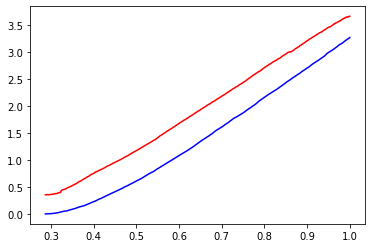

In [53]:
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])
plt.plot(test_a1[3],test_p_pred[3],label = 'pred',color = 'red')
plt.plot(test_a1[3],test_p[3],label = 'true',color = 'blue')

In [75]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)
opt = keras.optimizers.SGD(learning_rate = 1)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=25, shuffle=True, verbose=2)

Epoch 1/500
3/3 - 0s - loss: 5.0130 - accuracy: 0.0000e+00 - val_loss: 1.8393 - val_accuracy: 0.0000e+00 - 472ms/epoch - 157ms/step
Epoch 2/500
3/3 - 0s - loss: 3.7744 - accuracy: 0.0000e+00 - val_loss: 5.3447 - val_accuracy: 0.0000e+00 - 22ms/epoch - 7ms/step
Epoch 3/500
3/3 - 0s - loss: 2.2781 - accuracy: 0.0000e+00 - val_loss: 27.5112 - val_accuracy: 0.0000e+00 - 23ms/epoch - 8ms/step
Epoch 4/500
3/3 - 0s - loss: 1.6076 - accuracy: 0.0175 - val_loss: 30.1804 - val_accuracy: 0.0667 - 25ms/epoch - 8ms/step
Epoch 5/500
3/3 - 0s - loss: 1.5357 - accuracy: 0.0000e+00 - val_loss: 31.4246 - val_accuracy: 0.0667 - 24ms/epoch - 8ms/step
Epoch 6/500
3/3 - 0s - loss: 1.2722 - accuracy: 0.0175 - val_loss: 30.9961 - val_accuracy: 0.0667 - 24ms/epoch - 8ms/step
Epoch 7/500
3/3 - 0s - loss: 1.1725 - accuracy: 0.0175 - val_loss: 31.4787 - val_accuracy: 0.0000e+00 - 28ms/epoch - 9ms/step
Epoch 8/500
3/3 - 0s - loss: 1.4410 - accuracy: 0.0175 - val_loss: 28.0856 - val_accuracy: 0.0000e+00 - 25ms/epoc

Text(0, 0.5, 'loss')

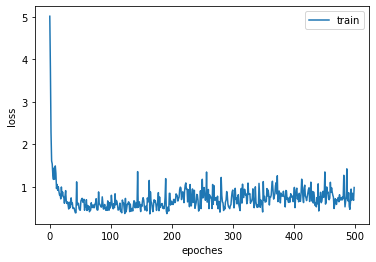

In [76]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

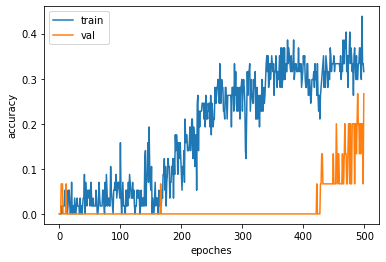

In [77]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('accuracy')

1/1 [==============================] - 0s 23ms/step - loss: 0.7246 - accuracy: 0.5556


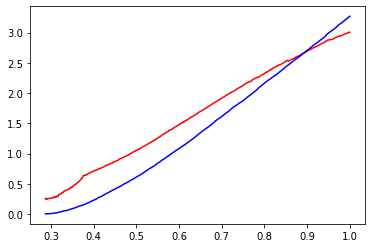

In [78]:
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])
plt.plot(test_a1[3],test_p_pred[3],label = 'pred',color = 'red')
plt.plot(test_a1[3],test_p[3],label = 'true',color = 'blue')